In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# using Seaborn Style
plt.style.use('seaborn')

In [2]:
# Reading CSV File using Pandas
df = pd.read_csv('Real estate.csv')

In [3]:
# Columns Names
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


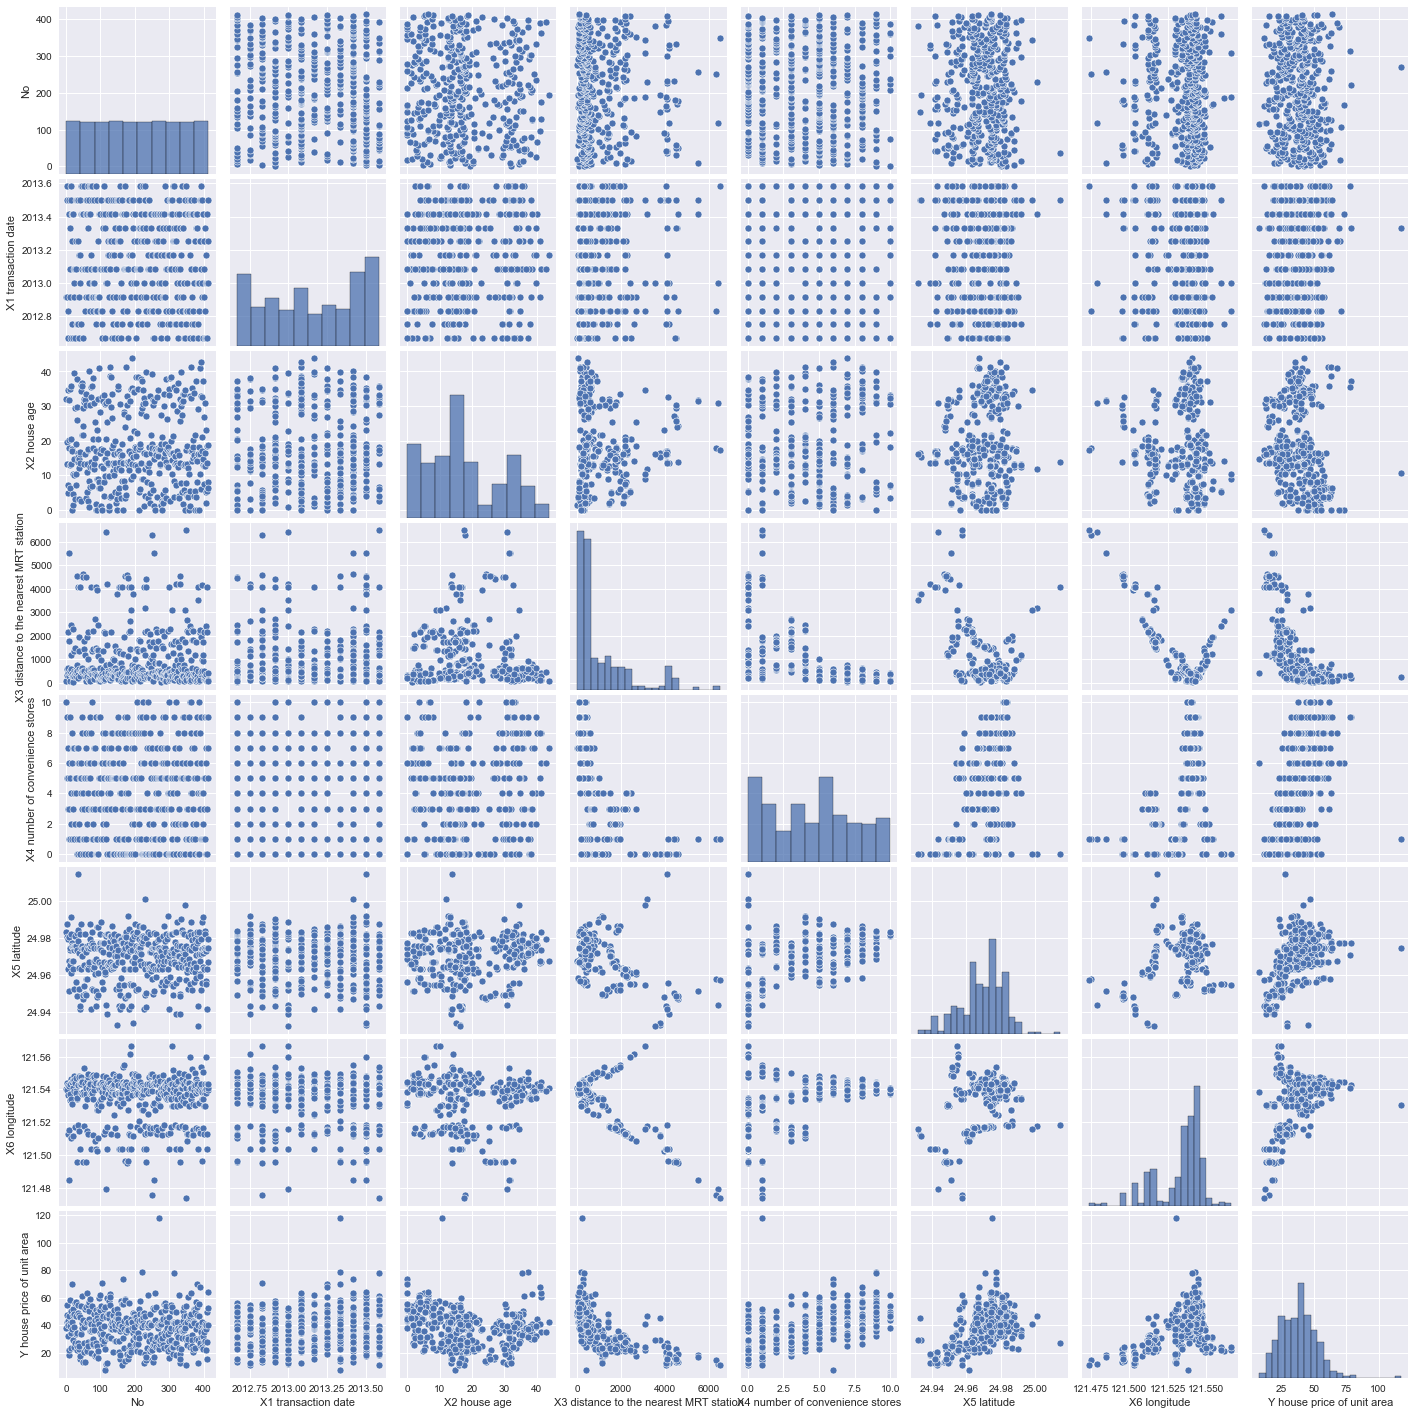

In [5]:
sns.pairplot(df)
plt.show()

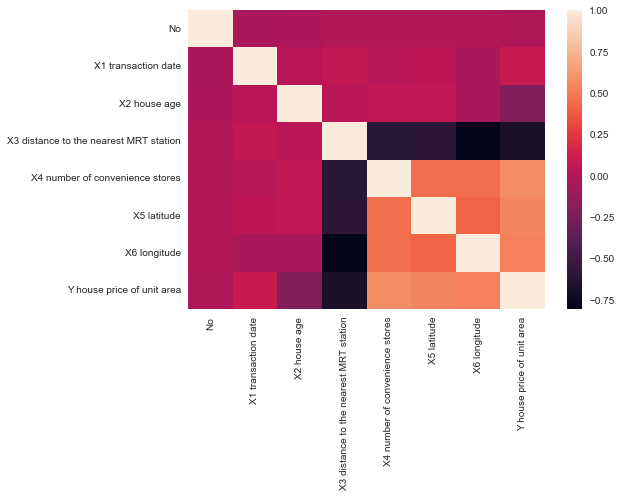

In [6]:
# Generating HeatMap of coorelation 
sns.heatmap(df.corr())
plt.show()

In [7]:
independent_variables = df.columns.to_list()
independent_variables.remove("No")
independent_variables.remove("Y house price of unit area")
independent_variables

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

In [8]:
X,y = df[independent_variables].values,df["Y house price of unit area"].values

In [9]:
# Shape of X and y
X.shape,y.shape

((414, 6), (414,))

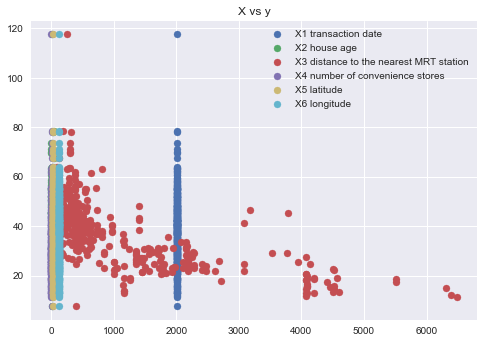

In [10]:
# Plot Between X1 and y && X2 and y
for i in range(len(independent_variables)):
    plt.scatter(X[:,i],y,label = independent_variables[i])
    plt.legend()
plt.title("X vs y")
plt.show()

In [11]:
# Scaling The Data
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [12]:
# creating Regression,Ridge and Lasso model

lr = LinearRegression()
r = Ridge()
l = Lasso()

In [13]:
# Fitting the model
lr.fit(X,y)
r.fit(X,y)
l.fit(X,y)

Lasso()

In [14]:
# Model's Coefficient and Intercept
print(lr.coef_,lr.intercept_)
print(r.coef_,r.intercept_)
print(l.coef_,l.intercept_)

[ 1.449314   -3.06878822 -5.65682337  3.33410316  2.79478248 -0.19043687] 37.98019323671375
[ 1.44419265 -3.06111214 -5.61219923  3.33516027  2.79963048 -0.15639247] 37.98019323671381
[ 0.43060349 -1.99755499 -5.13094677  2.75985681  2.25943959  0.        ] 37.98019323671451


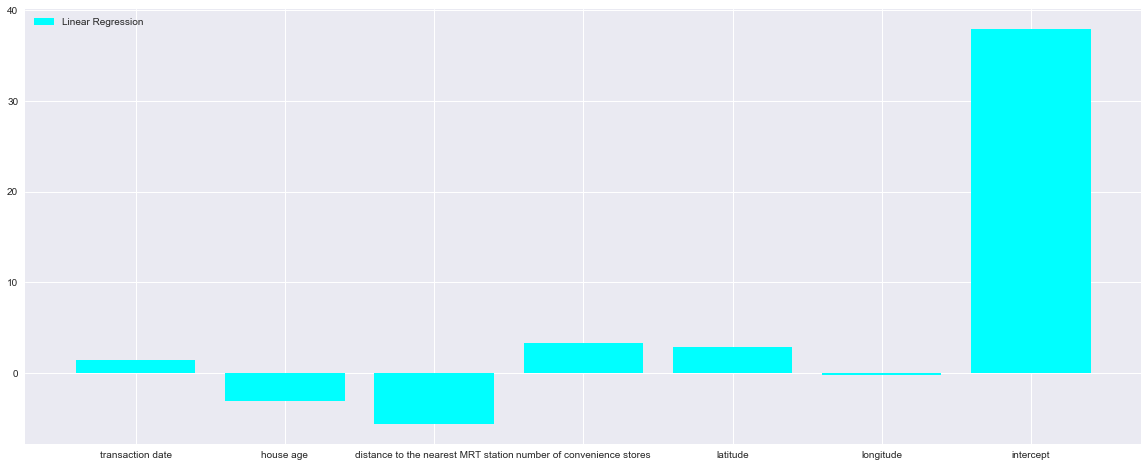

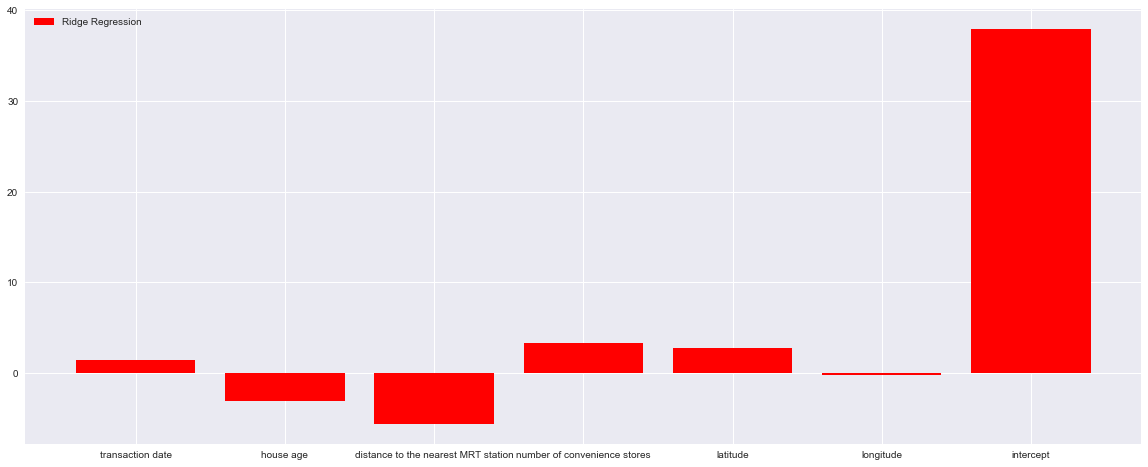

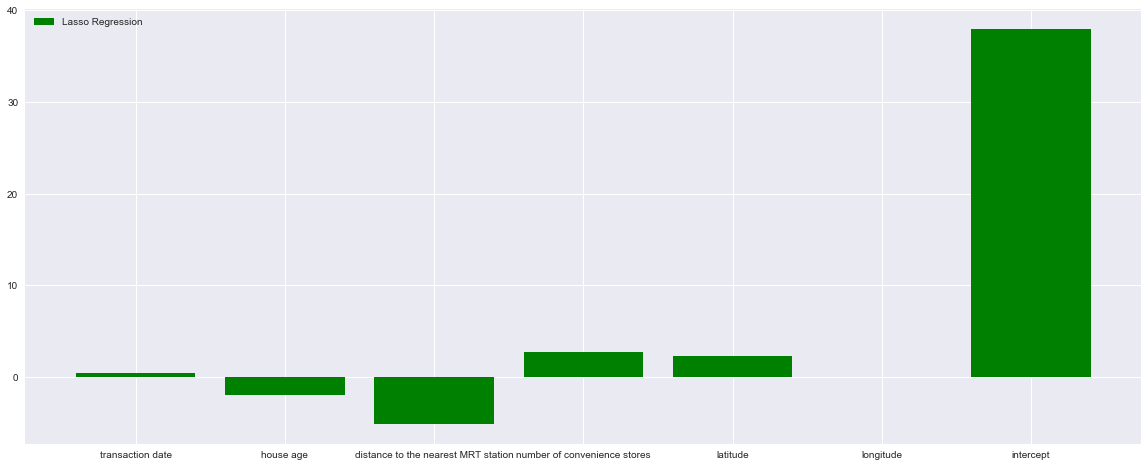

In [15]:
x = [i[3:] for i in independent_variables]
x.append("intercept")

coef = lr.coef_.tolist()
coef.append(lr.intercept_)

plt.figure(figsize=(20,8))
plt.bar(x,coef,label="Linear Regression",color='cyan')
plt.legend()
plt.show()

coef = r.coef_.tolist()
coef.append(r.intercept_)

plt.figure(figsize=(20,8))
plt.bar(x,coef,label="Ridge Regression",color='red')
plt.legend()
plt.show()

coef = l.coef_.tolist()
coef.append(l.intercept_)

plt.figure(figsize=(20,8))
plt.bar(x,coef,label="Lasso Regression",color='green')
plt.legend()
plt.show()